In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno
# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

import warnings
import datetime
warnings.filterwarnings('ignore')

In [0]:
filename = "/kaggle/input/ece657aw20asg4coronavirus/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(filename)
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,444,484,521,555,607,665,714,784,840,906
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,400,409,416,433,446,467,475,494,518,539
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,564,583,601,601,638,646,659,673,673,696
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,2,3,4,4,4,4,4,4,4,4
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,4,4,4,4,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 91 columns):
Province/State    82 non-null object
Country/Region    264 non-null object
Lat               264 non-null float64
Long              264 non-null float64
1/22/20           264 non-null int64
1/23/20           264 non-null int64
1/24/20           264 non-null int64
1/25/20           264 non-null int64
1/26/20           264 non-null int64
1/27/20           264 non-null int64
1/28/20           264 non-null int64
1/29/20           264 non-null int64
1/30/20           264 non-null int64
1/31/20           264 non-null int64
2/1/20            264 non-null int64
2/2/20            264 non-null int64
2/3/20            264 non-null int64
2/4/20            264 non-null int64
2/5/20            264 non-null int64
2/6/20            264 non-null int64
2/7/20            264 non-null int64
2/8/20            264 non-null int64
2/9/20            264 non-null int64
2/10/20           264 non-null int64
2/

In [0]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

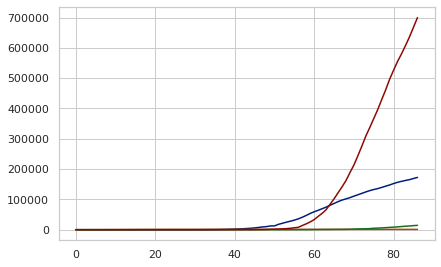

In [0]:
countries=['China', 'India', 'US']
y=df.loc[df['Country/Region']=='Italy'].iloc[0,4:]
s = pd.DataFrame({'Italy':y})
for c in countries:    
    #pyplot.plot(range(y.shape[0]),y,'r--')
    s[c] = df.loc[df['Country/Region']==c].iloc[0,4:]
#pyplot.plot(range(y.shape[0]),y,'g-')
plt.plot(range(y.shape[0]), s)

In [0]:
s

,Italy,China,India,US
1/22/20,0,1,0,1
1/23/20,0,9,0,1
1/24/20,0,15,0,2
1/25/20,0,39,0,2
1/26/20,0,60,0,5
...,...,...,...,...
4/13/20,159516,991,10453,580619
4/14/20,162488,991,11487,607670
4/15/20,165155,991,12322,636350
4/16/20,168941,991,13430,667801


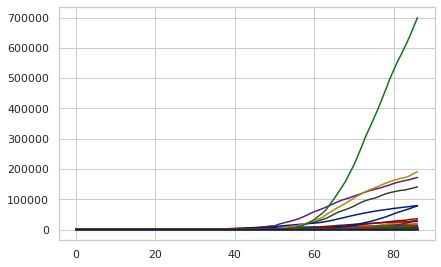

In [0]:
for r in df['Country/Region']:
    if r != 'China':
        plt.plot(range(len(df.columns)-4), df.loc[df['Country/Region']==r].iloc[0,4:])
#         pyplot.legend()

# US

In [0]:
df[df['Country/Region'].str.match('US')]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,429052,461437,496535,526396,555313,580619,607670,636350,667801,699706


# China

In [0]:
df[df['Country/Region'].str.match('China')]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,990,991,991,991,991,991,991,991,991,991
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,588,588,588,589,589,589,589,590,593,593
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,579,579,579,579,579,579,579,579,579,579
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,351,351,351,351,352,352,353,353,353,354
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,...,139,139,139,139,139,139,139,139,139,139
54,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1536,1539,1544,1548,1552,1555,1564,1566,1571,1577
55,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,254,254,254,254,254,254,254,254,254,254
56,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,146,146,146,146,146,146,146,146,146,146
57,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,168,168,168,168,168,168,168,168,168,168
58,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,327,327,327,327,327,327,327,327,328,328


# India

In [0]:
df[df['Country/Region'].str.match('India')]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
131,NaN,India,21.0,78.0,0,0,0,0,0,0,...,5916,6725,7598,8446,9205,10453,11487,12322,13430,14352


In [0]:
india=df.loc[df['Country/Region']=='India'].iloc[0,4:]

In [0]:
india = pd.DataFrame({'India':india})


In [0]:
india

,India
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
4/13/20,10453
4/14/20,11487
4/15/20,12322
4/16/20,13430


### Fixing china's cummulative number-Pronvices.

In [0]:
x=df.loc[df['Country/Region']=='China']

In [0]:
x.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,990,991,991,991,991,991,991,991,991,991
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,588,588,588,589,589,589,589,590,593,593
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,579,579,579,579,579,579,579,579,579,579
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,351,351,351,351,352,352,353,353,353,354
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,...,139,139,139,139,139,139,139,139,139,139


In [0]:
china=x.iloc[:,4:].sum(axis = 0, skipna = True)

In [0]:
china= pd.DataFrame({'China':china})

## china's cummulative numbers

In [0]:
china

,China
1/22/20,548
1/23/20,643
1/24/20,920
1/25/20,1406
1/26/20,2075
...,...
4/13/20,83213
4/14/20,83306
4/15/20,83356
4/16/20,83403


## Preparing full dataframe for 3 countries

In [0]:
countries=['China','US']

In [0]:
countries_3=india

In [0]:
for c in countries:
    countries_3[c] = df.loc[df['Country/Region']==c].iloc[0,4:]

In [0]:
countries_3

,India,China,US
1/22/20,0,1,1
1/23/20,0,9,1
1/24/20,0,15,2
1/25/20,0,39,2
1/26/20,0,60,5
...,...,...,...
4/13/20,10453,991,580619
4/14/20,11487,991,607670
4/15/20,12322,991,636350
4/16/20,13430,991,667801


In [0]:
countries_3.drop(['China'],axis=1)

,India,US
1/22/20,0,1
1/23/20,0,1
1/24/20,0,2
1/25/20,0,2
1/26/20,0,5
...,...,...
4/13/20,10453,580619
4/14/20,11487,607670
4/15/20,12322,636350
4/16/20,13430,667801


In [0]:
countries_3['China']=china

### Final dataframe for the three countries

In [0]:
countries_3

,India,China,US
1/22/20,0,548,1
1/23/20,0,643,1
1/24/20,0,920,2
1/25/20,0,1406,2
1/26/20,0,2075,5
...,...,...,...
4/13/20,10453,83213,580619
4/14/20,11487,83306,607670
4/15/20,12322,83356,636350
4/16/20,13430,83403,667801


In [0]:
# from sklearn.preprocessing import MinMaxScaler 
# scaler=MinMaxScaler()
# countries_3_norm = scaler.fit_transform(countries_3)

In [0]:
# countries_3_norm=pd.DataFrame(countries_3_norm)
# countries_3_norm.columns=['India','China','US']

In [0]:
# countries_3_norm

In [0]:
# countries_3_norm_va=countries_3_norm.values

In [0]:
# countries_3_norm_va.shape

In [0]:
# train_va=train.values
# test_va=test.values

In [0]:
india1=countries_3.iloc[:,0]

In [0]:
india1=pd.DataFrame(india1)

##### Creating a separate df for india

In [0]:
india1

,India
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
4/13/20,10453
4/14/20,11487
4/15/20,12322
4/16/20,13430


## Normalizing the dataset 

In [0]:
from sklearn.preprocessing import MinMaxScaler 
scaler1=MinMaxScaler()
india1 = scaler1.fit_transform(india1)

# # india1=india1/14352

In [0]:
india1=np.array(india1)

In [0]:
india1.shape

(87, 1)

In [0]:
india1

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [6.96767001e-05],
       [6.96767001e-05],
       [6.96767001e-05],
       [1.39353400e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],


In [0]:
lag = 5
#assuming target column is last one
X=[ ]
Y = [ ]
for x in range(lag, len(india1)):
    X.append(india1[x-lag:x,:])

In [0]:
X= np.array(X)


In [0]:
X.shape

(82, 5, 1)

In [0]:
count=5
Y=[]
# for i in range(0,87,6):
while(count<87):
    Y.append(india1[count])
    count=count+1
Y= np.array(Y)


In [0]:
Y.shape

(82, 1)

In [0]:
Y

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [6.96767001e-05],
       [6.96767001e-05],
       [6.96767001e-05],
       [1.39353400e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [2.09030100e-04],
       [3.48383501e-04],
       [3.48383501e-04],
       [1.95094760e-03],
       [2.09030100e-03],
       [2.15997770e-03],


In [0]:
X

array([[[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [6.96767001e-05]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [6.96767001e-05],
        [6.96767001e-05]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [6.96767001e-05],
        [6.96767001e-05],
        [6.96767001e-05]],

       [[0.00000000e+00],
        [6.96767001e-05],
        [6.96767001e-05]

##### converting into a single list {target}

In [0]:
target=[]
for i in range(0,82):
    target.append(Y[i][0])

In [0]:
target

[0.0,
 0.0,
 0.0,
 6.967670011148272e-05,
 6.967670011148272e-05,
 6.967670011148272e-05,
 0.00013935340022296544,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.00020903010033444816,
 0.0003483835005574136,
 0.0003483835005574136,
 0.001950947603121516,
 0.0020903010033444815,
 0.0021599777034559645,
 0.0023690078037904125,
 0.002717391304347826,
 0.0029960981047937

In [0]:
data=X

In [0]:
data.shape

(82, 5, 1)

In [0]:
target= np.array(target)


In [0]:
target.shape

(82,)

## Target and data contain the normalized values for India.

#### Splitting the dataset

In [0]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(data,target,test_size=0.2,random_state=42)

In [0]:
xtrain.shape

(65, 5, 1)

In [0]:
ytrain.shape

(65,)

### Importing keras libraries

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()  
model.add(LSTM((1),input_shape=(5,1),return_sequences=True))
model.add(LSTM((1),return_sequences=False))
# model.add(Dense(100))
model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])


Using TensorFlow backend.


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 1)              12        
_________________________________________________________________
lstm_2 (LSTM)                (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])
model.fit(xtrain, ytrain, epochs=50, batch_size=1,validation_data=(xtest, ytest))

Train on 65 samples, validate on 17 samples
Epoch 1/50
65/65 [==============================] - 3s 47ms/step - loss: 0.1163 - accuracy: 0.0308 - val_loss: 0.0599 - val_accuracy: 0.0588
Epoch 2/50
65/65 [==============================] - 1s 13ms/step - loss: 0.1139 - accuracy: 0.0308 - val_loss: 0.0563 - val_accuracy: 0.0588
Epoch 3/50
65/65 [==============================] - 1s 13ms/step - loss: 0.1109 - accuracy: 0.0308 - val_loss: 0.0554 - val_accuracy: 0.0588
Epoch 4/50
65/65 [==============================] - 1s 15ms/step - loss: 0.1061 - accuracy: 0.0308 - val_loss: 0.0513 - val_accuracy: 0.0588
Epoch 5/50
65/65 [==============================] - 1s 14ms/step - loss: 0.0997 - accuracy: 0.0308 - val_loss: 0.0474 - val_accuracy: 0.0588
Epoch 6/50
65/65 [==============================] - 1s 14ms/step - loss: 0.0908 - accuracy: 0.0308 - val_loss: 0.0436 - val_accuracy: 0.0588
Epoch 7/50
65/65 [==============================] - 1s 14ms/step - loss: 0.0815 - accuracy: 0.0308 - val_loss:

In [0]:
predict = model.predict(xtest)

In [0]:
predict

array([[0.00353347],
       [0.00324986],
       [0.00353347],
       [0.00353347],
       [0.00353347],
       [0.00353347],
       [0.00345128],
       [0.016184  ],
       [0.00325773],
       [0.00353347],
       [0.01083486],
       [0.00353347],
       [0.21485887],
       [0.00353347],
       [0.2653449 ],
       [0.00731976],
       [0.646473  ]], dtype=float32)

In [0]:
ytest

array([2.09030100e-04, 0.00000000e+00, 2.09030100e-04, 2.09030100e-04,
       2.09030100e-04, 2.09030100e-04, 2.09030100e-04, 1.70011148e-02,
       6.96767001e-05, 2.09030100e-04, 8.29152731e-03, 2.09030100e-04,
       2.14743590e-01, 3.48383501e-04, 2.50000000e-01, 5.08639911e-03,
       5.88489409e-01])

In [0]:
predict.shape

(17, 1)

In [0]:
ytest.shape

(17,)

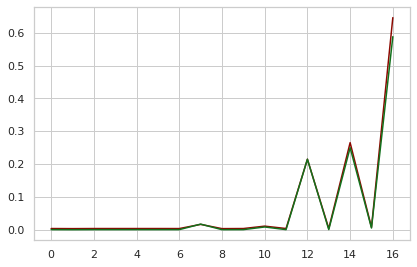

In [0]:
plt.plot(range(17),predict,c='r')
plt.plot(range(17),ytest,c='g')
plt.show()

### Now We will be Moving to our main objective of visualizations to see the patterns betwen the Confirmed cases and the fluctuations in the stock indexes of U.S, China and India.

# Visualizations

In [0]:
countries_3

,India,China,US
1/22/20,0,548,1
1/23/20,0,643,1
1/24/20,0,920,2
1/25/20,0,1406,2
1/26/20,0,2075,5
...,...,...,...
4/13/20,10453,83213,580619
4/14/20,11487,83306,607670
4/15/20,12322,83356,636350
4/16/20,13430,83403,667801


In [0]:
countries_3_update=countries_3.reset_index(drop=False)

In [0]:
countries_3_update

,index,India,China,US
0,1/22/20,0,548,1
1,1/23/20,0,643,1
2,1/24/20,0,920,2
3,1/25/20,0,1406,2
4,1/26/20,0,2075,5
...,...,...,...,...
82,4/13/20,10453,83213,580619
83,4/14/20,11487,83306,607670
84,4/15/20,12322,83356,636350
85,4/16/20,13430,83403,667801


In [0]:
countries_3_update=countries_3_update.rename(columns={"index": "Dates"})

## Loading stocks data

In [0]:
gspc="/kaggle/input/stock-history/GSPC.csv"
gspc = pd.read_csv(gspc)

nifty="/kaggle/input/stock-history/NSEI.csv"
nifty = pd.read_csv(nifty)

shanghai_composite="/kaggle/input/stock-history/000001.SS (2).csv"
shanghai_composite= pd.read_csv(shanghai_composite)

In [0]:
countries_3_update

,Dates,India,China,US
0,1/22/20,0,548,1
1,1/23/20,0,643,1
2,1/24/20,0,920,2
3,1/25/20,0,1406,2
4,1/26/20,0,2075,5
...,...,...,...,...
82,4/13/20,10453,83213,580619
83,4/14/20,11487,83306,607670
84,4/15/20,12322,83356,636350
85,4/16/20,13430,83403,667801


## India confirmed cases--

In [0]:
import plotly.express as ax
fig = ax.bar(countries_3_update, x='Dates', y='India', title='India: Confirmed Cases')
fig.show()

## US confirmed cases--

In [0]:
fig = ax.bar(countries_3_update, x='Dates', y='US', title='US: Confirmed Cases')
fig.show()

## China confirmed cases--

In [0]:
fig = ax.bar(countries_3_update, x='Dates', y='China', title='China: Confirmed Cases')
fig.show()

### Comparison of confirmed cases between the 3 countries

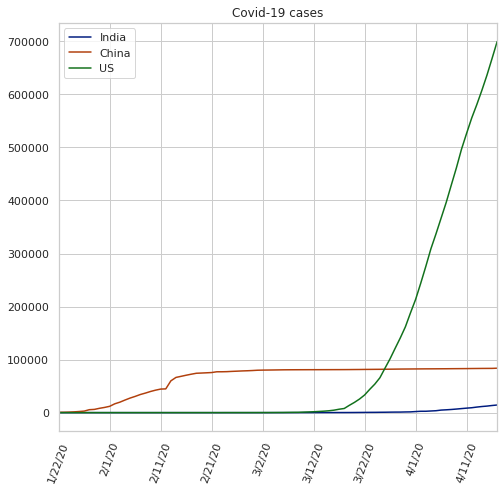

In [0]:
plt.figure(figsize=(7,7))
for i, col in enumerate(countries_3.columns):
    countries_3[col].plot()
plt.title('Covid-19 cases')
plt.xticks(rotation=70)
plt.legend(countries_3.columns)

# Indexes---
### 1. Dow | GSPC -> U.S
### 2. Shanghai Composite -> China
### 3. Nifty -> India

## gspc- Dow jones

In [0]:
gspc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,22-01-19,2657.879883,2657.879883,2617.270020,2632.899902,2632.899902,3908030000
1,23-01-19,2643.479980,2653.189941,2612.860107,2638.699951,2638.699951,3335610000
2,24-01-19,2638.840088,2647.199951,2627.010010,2642.330078,2642.330078,3433250000
3,25-01-19,2657.439941,2672.379883,2657.330078,2664.760010,2664.760010,3814080000
4,28-01-19,2644.969971,2644.969971,2624.060059,2643.850098,2643.850098,3612810000


In [0]:
gspc.loc[gspc['Date']=='22-01-20'].index.values

array([257])

In [0]:
gspc.iloc[257,:]

Date           22-01-20
Open            3330.02
High            3337.77
Low             3320.04
Close           3321.75
Adj Close       3321.75
Volume       3619850000
Name: 257, dtype: object

## Fixing gspc for Plottings

In [0]:
gspc_plots=gspc.iloc[257:,:].reset_index(drop=True)
gspc_plots=gspc_plots.set_index('Date')

In [0]:
gspc_plots

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
22-01-20,3330.020020,3337.770020,3320.040039,3321.750000,3321.750000,3619850000
23-01-20,3315.770020,3326.879883,3301.870117,3325.540039,3325.540039,3764860000
24-01-20,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971,3707130000
25-01-20,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971,3707130000
26-01-20,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971,3707130000
...,...,...,...,...,...,...
13-04-20,2782.459961,2782.459961,2721.169922,2761.629883,2761.629883,5274310000
14-04-20,2805.100098,2851.850098,2805.100098,2846.060059,2846.060059,5567400000
15-04-20,2795.639893,2801.879883,2761.540039,2783.360107,2783.360107,5203390000


In [0]:
gspc_plots=gspc_plots.drop(['High','Low','Close','Adj Close','Volume'], axis=1)

In [0]:
gspc_plots

,Open
Date,
22-01-20,3330.020020
23-01-20,3315.770020
24-01-20,3333.100098
25-01-20,3333.100098
26-01-20,3333.100098
...,...
13-04-20,2782.459961
14-04-20,2805.100098
15-04-20,2795.639893


### Fixing Nifty-50 for plottings

In [0]:
nifty.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,22-01-19,10949.79981,10949.79981,10864.15039,10922.75000,10922.75000,300800.0
1,23-01-19,10931.04981,10944.79981,10811.95020,10831.50000,10831.50000,298900.0
2,24-01-19,10844.04981,10866.59961,10798.65039,10849.79981,10849.79981,361100.0
3,25-01-19,10859.75000,10931.70020,10756.45020,10780.54981,10780.54981,463400.0
4,28-01-19,10792.45020,10804.45020,10630.95020,10661.54981,10661.54981,419700.0


In [0]:
nifty.loc[nifty['Date']=='22-01-20'].index.values

array([243])

In [0]:
nifty.iloc[243,:]

Date         22-01-20
Open          12218.3
High            12225
Low           12087.9
Close         12106.9
Adj Close     12106.9
Volume            500
Name: 243, dtype: object

In [0]:
nifty_plots=nifty.iloc[243:,:].reset_index(drop=True)
nifty_plots=nifty_plots.set_index('Date')

In [0]:
nifty_plots=nifty_plots.drop(['High','Low','Close','Adj Close','Volume'], axis=1)

In [0]:
nifty_plots

,Open
Date,
22-01-20,12218.349610
23-01-20,12123.750000
24-01-20,12174.549810
25-01-20,12174.549810
26-01-20,12174.549810
...,...
13-04-20,9103.950195
14-04-20,9103.950195
15-04-20,9196.400391


### fixing Shanghai- composite for plottings


In [0]:
shanghai_composite.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,22-01-19,2609.642090,2609.642090,2573.062012,2579.704102,2579.704102,152500.0
1,23-01-19,2575.258057,2589.512939,2572.405029,2581.003906,2581.003906,131400.0
2,24-01-19,2584.647949,2597.289063,2569.699951,2591.694092,2591.694092,154000.0
3,25-01-19,2596.261963,2617.001953,2595.628906,2601.722900,2601.722900,159400.0
4,28-01-19,2615.711914,2630.318115,2591.100098,2596.977051,2596.977051,147000.0


In [0]:
shanghai_composite.loc[shanghai_composite['Date']=='22-01-20'].index.values

array([242])

In [0]:
shanghai_composite.iloc[242,:]

Date         22-01-20
Open          3038.49
High          3069.25
Low           3006.27
Close         3060.75
Adj Close     3060.75
Volume         223900
Name: 242, dtype: object

In [0]:
shanghai_composite_plots=shanghai_composite.iloc[242:,:].reset_index(drop=True)
shanghai_composite_plots=shanghai_composite_plots.set_index('Date')

In [0]:
shanghai_composite_plots=shanghai_composite_plots.drop(['High','Low','Close','Adj Close','Volume'], axis=1)

In [0]:
shanghai_composite_plots

,Open
Date,
22-01-20,3038.487061
23-01-20,3037.951904
24-01-20,3037.951904
25-01-20,3037.951904
26-01-20,3037.951904
...,...
13-04-20,2784.597900
14-04-20,2794.801025
15-04-20,2826.662109


### combining Individual indexes {Open Price}--

In [0]:
stock_3=gspc_plots
stock_3=stock_3.rename(columns={"Open": "GSPC"})
stock_3['NIFTY']=nifty_plots['Open']
stock_3['SHANGHAI COMPOSITE']=shanghai_composite_plots['Open']

In [0]:
stock_3

,GSPC,NIFTY,SHANGHAI COMPOSITE
Date,,,
22-01-20,3330.020020,12218.349610,3038.487061
23-01-20,3315.770020,12123.750000,3037.951904
24-01-20,3333.100098,12174.549810,3037.951904
25-01-20,3333.100098,12174.549810,3037.951904
26-01-20,3333.100098,12174.549810,3037.951904
...,...,...,...
13-04-20,2782.459961,9103.950195,2784.597900
14-04-20,2805.100098,9103.950195,2794.801025
15-04-20,2795.639893,9196.400391,2826.662109


In [0]:
stock_3=stock_3.reset_index(drop=False)

In [0]:
stock_3

,Date,GSPC,NIFTY,SHANGHAI COMPOSITE
0,22-01-20,3330.020020,12218.349610,3038.487061
1,23-01-20,3315.770020,12123.750000,3037.951904
2,24-01-20,3333.100098,12174.549810,3037.951904
3,25-01-20,3333.100098,12174.549810,3037.951904
4,26-01-20,3333.100098,12174.549810,3037.951904
...,...,...,...,...
82,13-04-20,2782.459961,9103.950195,2784.597900
83,14-04-20,2805.100098,9103.950195,2794.801025
84,15-04-20,2795.639893,9196.400391,2826.662109
85,16-04-20,2799.340088,8851.250000,2798.429932


#### creating a copy of stock_3 for later predictions

In [0]:
demo_stock=stock_3

In [0]:
demo_stock=demo_stock.iloc[:,1:]

In [0]:
demo_stock

,GSPC,NIFTY,SHANGHAI COMPOSITE
0,3330.020020,12218.349610,3038.487061
1,3315.770020,12123.750000,3037.951904
2,3333.100098,12174.549810,3037.951904
3,3333.100098,12174.549810,3037.951904
4,3333.100098,12174.549810,3037.951904
...,...,...,...
82,2782.459961,9103.950195,2784.597900
83,2805.100098,9103.950195,2794.801025
84,2795.639893,9196.400391,2826.662109
85,2799.340088,8851.250000,2798.429932


In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

Normalized_stocks=scaler.fit_transform(demo_stock)
Normalized_stocks=pd.DataFrame(Normalized_stocks)
Normalized_stocks['Date']=stock_3['Date']

In [0]:
Normalized_stocks

,0,1,2,Date
0,1.078975,1.068317,1.414782,22-01-20
1,1.038911,1.009235,1.410076,23-01-20
2,1.087634,1.040962,1.410076,24-01-20
3,1.087634,1.040962,1.410076,25-01-20
4,1.087634,1.040962,1.410076,26-01-20
...,...,...,...,...
82,-0.460501,-0.876796,-0.817961,13-04-20
83,-0.396848,-0.876796,-0.728233,14-04-20
84,-0.423446,-0.819056,-0.448041,15-04-20
85,-0.413042,-1.034621,-0.696320,16-04-20


In [0]:
Normalized_stocks=Normalized_stocks.rename(columns={0:"GSPC",1:'NIFTY',2:'SHANGHAI'})


In [0]:
Normalized_stocks

,GSPC,NIFTY,SHANGHAI,Date
0,1.078975,1.068317,1.414782,22-01-20
1,1.038911,1.009235,1.410076,23-01-20
2,1.087634,1.040962,1.410076,24-01-20
3,1.087634,1.040962,1.410076,25-01-20
4,1.087634,1.040962,1.410076,26-01-20
...,...,...,...,...
82,-0.460501,-0.876796,-0.817961,13-04-20
83,-0.396848,-0.876796,-0.728233,14-04-20
84,-0.423446,-0.819056,-0.448041,15-04-20
85,-0.413042,-1.034621,-0.696320,16-04-20


In [0]:
Normalized_stocks=Normalized_stocks.set_index('Date')

In [0]:
Normalized_stocks

,GSPC,NIFTY,SHANGHAI
Date,,,
22-01-20,1.078975,1.068317,1.414782
23-01-20,1.038911,1.009235,1.410076
24-01-20,1.087634,1.040962,1.410076
25-01-20,1.087634,1.040962,1.410076
26-01-20,1.087634,1.040962,1.410076
...,...,...,...
13-04-20,-0.460501,-0.876796,-0.817961
14-04-20,-0.396848,-0.876796,-0.728233
15-04-20,-0.423446,-0.819056,-0.448041


### COUNTRY WISE COMPARISON BETWEEN THE INDEXES DURING THE PERIOD OF OUTBREAK.

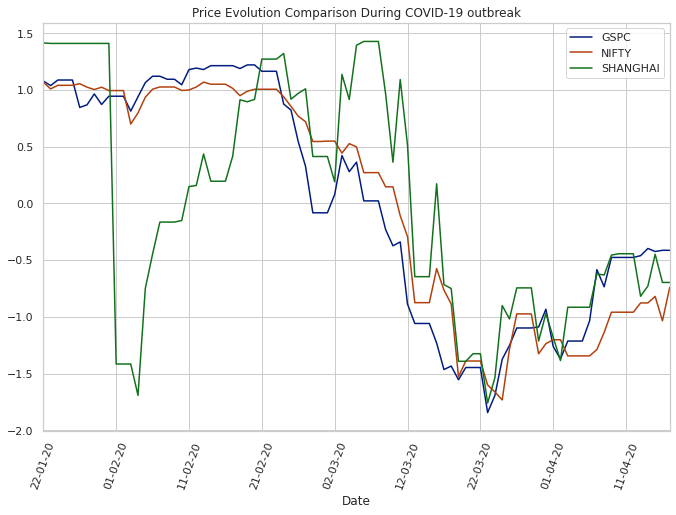

In [0]:
plt.figure(figsize=(10,7))
for i, col in enumerate(Normalized_stocks.columns):
    Normalized_stocks[col].plot()
plt.title('Price Evolution Comparison During COVID-19 outbreak')
plt.xticks(rotation=70)
plt.legend(Normalized_stocks.columns)

#### * Biggest fluctuations can be seen in the china's index during the early feb.
#### * All the 3 indexes are nearly close to each other after all the fluctuations since 17th April.

# Countrywise Number of cases and Index curve

In [0]:
countries_3_update.head()

,Dates,India,China,US
0,1/22/20,0,548,1
1,1/23/20,0,643,1
2,1/24/20,0,920,2
3,1/25/20,0,1406,2
4,1/26/20,0,2075,5


In [0]:
Normalized_stocks.head()

,GSPC,NIFTY,SHANGHAI
Date,,,
22-01-20,1.078975,1.068317,1.414782
23-01-20,1.038911,1.009235,1.410076
24-01-20,1.087634,1.040962,1.410076
25-01-20,1.087634,1.040962,1.410076
26-01-20,1.087634,1.040962,1.410076


### China's index Vs confirmed CoronaVirus cases

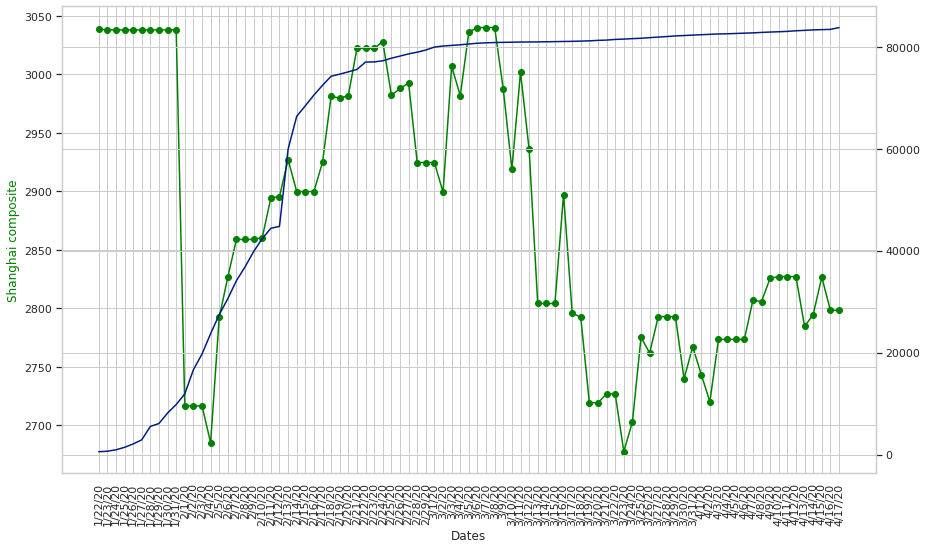

In [0]:
# plt.figure(figsize=(10,10))
# plt.xticks(rotate=90) without axes 

#using axes object
fig,ax=plt.subplots(figsize=(13,8))
ax.plot(countries_3_update.Dates,demo_stock['SHANGHAI COMPOSITE'],marker='o',color="green")
ax.set_xlabel("Dates")
ax.set_ylabel("Shanghai composite",color="green")
#rotating x axes ticks
# fig.autofmt_xdate() #or use for loop if not date 
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

#in order to get two y axes on same plot  we use twinx()

ax2=ax.twinx()
ax2.plot(countries_3_update.Dates,countries_3_update.China)


#### * Index fell drastically by 10% when the outbreak began.
#### * Now it is range bound at average levels.

## India's index vs Confirmed coronavirus cases

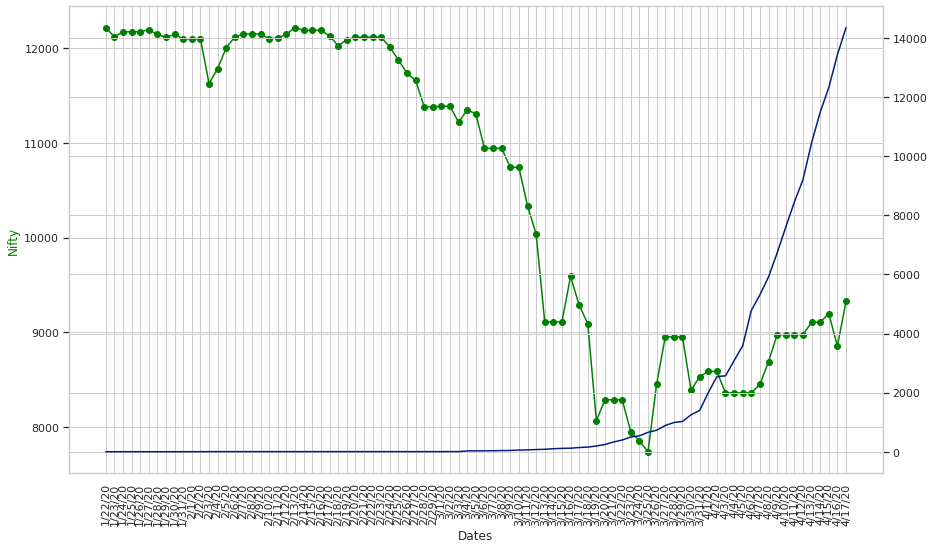

In [0]:
# plt.figure(figsize=(10,10))
# plt.xticks(rotate=90) without axes 

#using axes object
fig,ax=plt.subplots(figsize=(13,8))
ax.plot(countries_3_update.Dates,demo_stock['NIFTY'],marker='o',color="green")
ax.set_xlabel("Dates")
ax.set_ylabel("Nifty",color="green")
#rotating x axes ticks
# fig.autofmt_xdate() #or use for loop if not date 
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

#in order to get two y axes on same plot  we use twinx()

ax2=ax.twinx()
ax2.plot(countries_3_update.Dates,countries_3_update.India)

#### * 30% fall in the index can be seen during the period of outbreak till march.
#### * Sudden rise in the local cases didn't worsen the performance.

## US's index vs Confirmed coronavirus cases

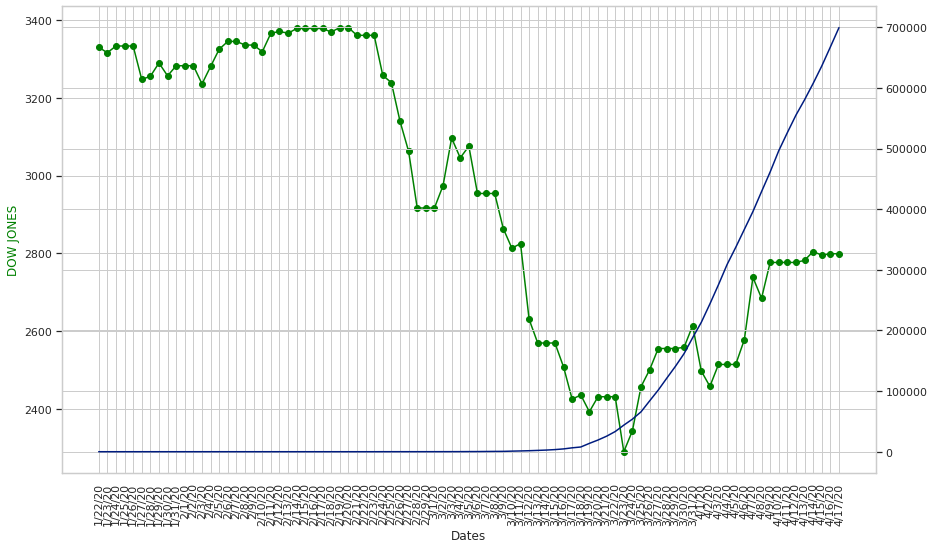

In [0]:
# plt.figure(figsize=(10,10))
# plt.xticks(rotate=90) without axes 

#using axes object
fig,ax=plt.subplots(figsize=(13,8))
ax.plot(countries_3_update.Dates,demo_stock['GSPC'],marker='o',color="green")
ax.set_xlabel("Dates")
ax.set_ylabel("DOW JONES",color="green")
#rotating x axes ticks
# fig.autofmt_xdate() #or use for loop if not date 
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

#in order to get two y axes on same plot  we use twinx()

ax2=ax.twinx()
ax2.plot(countries_3_update.Dates,countries_3_update.US)

#### * Index fell by 30% initially.
#### * Now it is range bound.

## Predicting Dow Jones During the period of outbreak

In [0]:
gspc_plots_predict=gspc.iloc[257:,:].reset_index(drop=True)
# gspc_plots=gspc_plots.set_index('Date')

In [0]:
gspc_plots_predict

,Date,Open,High,Low,Close,Adj Close,Volume
0,22-01-20,3330.020020,3337.770020,3320.040039,3321.750000,3321.750000,3619850000
1,23-01-20,3315.770020,3326.879883,3301.870117,3325.540039,3325.540039,3764860000
2,24-01-20,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971,3707130000
3,25-01-20,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971,3707130000
4,26-01-20,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971,3707130000
...,...,...,...,...,...,...,...
82,13-04-20,2782.459961,2782.459961,2721.169922,2761.629883,2761.629883,5274310000
83,14-04-20,2805.100098,2851.850098,2805.100098,2846.060059,2846.060059,5567400000
84,15-04-20,2795.639893,2801.879883,2761.540039,2783.360107,2783.360107,5203390000
85,16-04-20,2799.340088,2806.510010,2764.320068,2799.550049,2799.550049,5179990000


### Checking data correlations

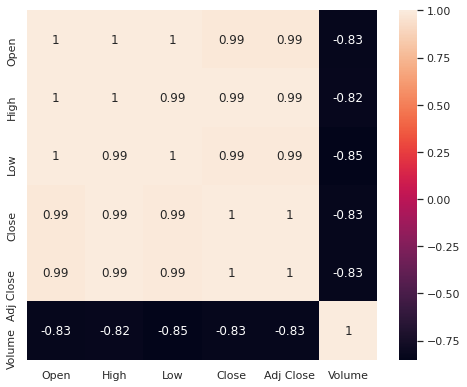

In [0]:
import seaborn as sns
plt.figure(1 , figsize = (7, 6))
cor = sns.heatmap(gspc_plots_predict.corr(), annot = True)

#### we are using the pattern followed during the outbreak only. So predictions are made on the basis of current volatality in the market. 

In [0]:
x = gspc_plots_predict.loc[:,'High':'Volume']
y = gspc_plots_predict.loc[:,'Open']

In [0]:
y

0     3330.020020
1     3315.770020
2     3333.100098
3     3333.100098
4     3333.100098
         ...     
82    2782.459961
83    2805.100098
84    2795.639893
85    2799.340088
86    2799.340088
Name: Open, Length: 87, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 42)

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [0]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
input_22_april=[[2815.10,2775.95,2799.31,2799.31,5049660000]]
predict_next = regressor.predict(input_22_april)

In [0]:
predict_next

array([2791.51178081])

### correct Open price is approximately similar to our prediction.